In [1]:
import pandas as pd
import numpy as np
from __future__ import division
import calendar
import time
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from dateutil.parser import parse
from pandas.tslib import Timestamp
colorz=sns.color_palette("husl", 8)
#sns.palplot(sns.color_palette("husl", 8))

In [2]:
smps=pd.read_csv('/Users/stella/Desktop/TSI 3031 Particle Counter_20170413.TXT',delimiter='\t',skiprows=4)

In [3]:
smps=smps.reset_index()
smps.columns=smps.iloc[0]
smps=smps.iloc[1:].reset_index()
smps.columns

Index(['index', 'id', 'start', 'end', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6',
       'status', 'bs', 'fs', 'dlimit', 'sheathflow', 'sheathtemperature',
       'sheathpressure', 'chargerflow', 'totalflow', 'chargervoltage',
       'chargercurrent', 'eadtemperature'],
      dtype='object', name=0)

In [4]:
del (smps['index'],smps['id'],smps['status'],smps['dlimit'],smps['bs'],smps['fs'],
    smps['sheathtemperature'],smps['sheathflow'],smps['sheathpressure'],smps['eadtemperature'],
    smps['chargerflow'], smps['totalflow'], smps['chargervoltage'], smps['chargercurrent'])

In [5]:
smps['start']=smps['start'].apply(lambda x: parse(x))
smps['end']=smps['end'].apply(lambda x: parse(x))

In [6]:
smps['delta t']=smps['end']-smps['start']

In [7]:
smps=smps.rename(columns={'ch1':'ch1: 20-30 nm',
                          'ch2':'ch2: 30-50 nm',
                          'ch3':'ch3: 50-70 nm',
                          'ch4':'ch4: 70-100 nm',
                          'ch5':'ch5: 100-200 nm',
                          'ch6':'ch6: 200+ nm'})

In [8]:
smps['ch1: 20-30 nm']=smps['ch1: 20-30 nm'].apply(lambda x: np.float(x))
smps['ch2: 30-50 nm']=smps['ch2: 30-50 nm'].apply(lambda x: np.float(x))
smps['ch3: 50-70 nm']=smps['ch3: 50-70 nm'].apply(lambda x: np.float(x))
smps['ch4: 70-100 nm']=smps['ch4: 70-100 nm'].apply(lambda x: np.float(x))
smps['ch5: 100-200 nm']=smps['ch5: 100-200 nm'].apply(lambda x: np.float(x))
smps['ch6: 200+ nm']=smps['ch6: 200+ nm'].apply(lambda x: np.float(x))
smps['sum: 20-200+ nm']=(smps['ch1: 20-30 nm']+smps['ch2: 30-50 nm']+smps['ch3: 50-70 nm']
                        +smps['ch4: 70-100 nm']+smps['ch5: 100-200 nm']+smps['ch6: 200+ nm'])

In [9]:
pegasor=pd.read_csv('/Users/stella/Desktop/1329_PEGASOR A_20170510151651.csv',delimiter=',',skiprows=3).reset_index()
pegasor.columns=pegasor.iloc[0]
pegasor=pegasor.iloc[1:].reset_index()
del pegasor['index'],pegasor['PAMBT_LABEL'],pegasor['ZEROLEVEL_LABEL'],pegasor['CORONAI_LABEL'],pegasor['CORONAU_LABEL']
del pegasor['PCORSTAB_LABEL'], pegasor['PCORSTABM_LABEL'],pegasor['ELECINTTEMP_LABEL']
del pegasor['PAMBRHUM_LABEL'],pegasor['MEASURE_N_LABEL']
del pegasor['PFILPRESS_LABEL'],pegasor['PSYSPRESS_LABEL'],pegasor['PCHASFANRPM_LABEL'],pegasor['ENCLOSTEMP']
del pegasor['TRAPU_LABEL'],pegasor['PROCTEMP_LABEL'],pegasor['STEMP_LABEL'],pegasor['INLETTEMP_LABEL']
pegasor['DateTime']=pegasor['DateTime'].apply(lambda x: parse(x))
pegasor=pegasor.dropna(axis=1)
pegasor.columns=['DateTime','ldsa1','pn1','ldsa2','pn2','ldsa3','pn3']

/Users/stella/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
pegasor['ldsa1']=pegasor['ldsa1'].apply(lambda x: np.float(x))
pegasor['ldsa2']=pegasor['ldsa2'].apply(lambda x: np.float(x))
pegasor['ldsa3']=pegasor['ldsa3'].apply(lambda x: np.float(x))
pegasor['pn1']=pegasor['pn1'].apply(lambda x: np.float(x))
pegasor['pn2']=pegasor['pn2'].apply(lambda x: np.float(x))
pegasor['pn3']=pegasor['pn3'].apply(lambda x: np.float(x))

In [11]:
pegasor=pegasor[pegasor['ldsa1']>0]
pegasor=pegasor[pegasor['ldsa2']>0]
pegasor=pegasor[pegasor['ldsa3']>0]
pegasor=pegasor[pegasor['pn1']>0]
pegasor=pegasor[pegasor['pn2']>0]
pegasor=pegasor[pegasor['pn3']>0]

In [13]:
pegasor=pegasor.reset_index()
del pegasor['index']

In [12]:
smps['start_down']=smps['start'].apply(lambda x: x.replace(second=0))
smps['end_down']=smps['end'].apply(lambda x: x.replace(second=0))
smps['end_up']=smps['end_down']+timedelta(minutes=1)

In [14]:
pegasor=pegasor[pegasor['DateTime']>=smps['start_down'][0]]
pegasor=pegasor[pegasor['DateTime']<=smps['end_up'][len(smps)-1]]
pegasor=pegasor.reset_index()
del pegasor['index']

In [15]:
smps['pegIdx14']=''
#smps['pegIdx15']=''

In [16]:
for index,row in smps.iterrows():
#    print(index, row['start_down'], row['end_up'])
    t1=smps['start_down'][index]
    t2=smps['end_down'][index]
    peg_idx=pegasor.loc[(pegasor['DateTime']>=t1) & (pegasor['DateTime']<=t2)].index
    smps['pegIdx14'][index]=peg_idx
    print(index)

/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [17]:
smps['pegSum14-pn1']=smps['pegIdx14'].apply(lambda x: sum(pegasor['pn1'][x]))
smps['pegSum14-pn2']=smps['pegIdx14'].apply(lambda x: sum(pegasor['pn2'][x]))
smps['pegSum14-pn3']=smps['pegIdx14'].apply(lambda x: sum(pegasor['pn3'][x]))

smps['pegAvg14-pn1']=smps['pegIdx14'].apply(lambda x: np.mean(pegasor['pn1'][x]))
smps['pegAvg14-pn2']=smps['pegIdx14'].apply(lambda x: np.mean(pegasor['pn2'][x]))
smps['pegAvg14-pn3']=smps['pegIdx14'].apply(lambda x: np.mean(pegasor['pn3'][x]))

In [18]:
smps.columns

Index(['start', 'end', 'ch1: 20-30 nm', 'ch2: 30-50 nm', 'ch3: 50-70 nm',
       'ch4: 70-100 nm', 'ch5: 100-200 nm', 'ch6: 200+ nm', 'delta t',
       'sum: 20-200+ nm', 'start_down', 'end_down', 'end_up', 'pegIdx14',
       'pegSum14-pn1', 'pegSum14-pn2', 'pegSum14-pn3', 'pegAvg14-pn1',
       'pegAvg14-pn2', 'pegAvg14-pn3'],
      dtype='object', name=0)

In [20]:
smps['pegAvg14-pn1']=pd.to_numeric(smps['pegAvg14-pn1'])
smps['pegAvg14-pn2']=pd.to_numeric(smps['pegAvg14-pn2'])
smps['pegAvg14-pn3']=pd.to_numeric(smps['pegAvg14-pn3'])

In [21]:
smps['pegAvg14_avg']=smps[['pegAvg14-pn1','pegAvg14-pn2','pegAvg14-pn3']].mean(axis=1)

In [22]:
smps.head()

,start,end,ch1: 20-30 nm,ch2: 30-50 nm,ch3: 50-70 nm,ch4: 70-100 nm,ch5: 100-200 nm,ch6: 200+ nm,delta t,sum: 20-200+ nm,...,end_down,end_up,pegIdx14,pegSum14-pn1,pegSum14-pn2,pegSum14-pn3,pegAvg14-pn1,pegAvg14-pn2,pegAvg14-pn3,pegAvg14_avg
0,2017-04-13 12:45:07,2017-04-13 12:59:37,8748.0,2974.0,81.0,73.0,254.0,17.0,00:14:30,12147.0,...,2017-04-13 12:59:00,2017-04-13 13:00:00,"Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, ...",2330052.367,1249812.239,2491691.346,155336.824467,83320.815933,166112.756400,134923.465600
1,2017-04-13 13:00:06,2017-04-13 13:14:36,9518.0,3887.0,216.0,39.0,218.0,15.0,00:14:30,13893.0,...,2017-04-13 13:14:00,2017-04-13 13:15:00,"Int64Index([15, 16, 17, 18, 19, 20, 21, 22, 23...",2616288.515,1495949.714,2827865.050,174419.234333,99729.980933,188524.336667,154224.517311
2,2017-04-13 13:15:06,2017-04-13 13:29:36,10216.0,4318.0,215.0,95.0,313.0,1.0,00:14:30,15158.0,...,2017-04-13 13:29:00,2017-04-13 13:30:00,"Int64Index([30, 31, 32, 33, 34, 35, 36, 37, 38...",2717487.073,1452155.680,2812493.150,181165.804867,96810.378667,187499.543333,155158.575622
3,2017-04-13 13:30:06,2017-04-13 13:44:36,11028.0,4295.0,232.0,205.0,399.0,0.0,00:14:30,16159.0,...,2017-04-13 13:44:00,2017-04-13 13:45:00,"Int64Index([45, 46, 47, 48, 49, 50, 51, 52, 53...",2982368.178,1580981.362,3162029.708,198824.545200,105398.757467,210801.980533,171675.094400
4,2017-04-13 13:45:07,2017-04-13 13:59:37,11412.0,6271.0,650.0,0.0,115.0,51.0,00:14:30,18499.0,...,2017-04-13 13:59:00,2017-04-13 14:00:00,"Int64Index([60, 61, 62, 63, 64, 65, 66, 67, 68...",2766796.450,1500789.988,2913174.592,184453.096667,100052.665867,194211.639467,159572.467333


In [23]:
times = pd.DatetimeIndex(smps.start)
grouped_smps = smps.groupby([times.month, times.day])
grouped_smps_sum=grouped_smps.sum().reset_index()

In [24]:
times = pd.DatetimeIndex(smps.start)
grouped_smps = smps.groupby([times.month, times.day])

In [25]:
grouped_smps_avg=grouped_smps.mean()

In [26]:
epc=pd.read_excel('/Users/stella/Desktop/Queens Data Logger TSI 3783 Ultrafine February to April.xls')[1:417].reset_index()
del epc['index']

In [27]:
epc.columns=['DateTime','UF Aggr Conc (#/cc)']
epc['DateTime']=epc['DateTime'].apply(lambda x: parse(x))

In [28]:
epc=epc[(epc['DateTime']>smps['start_down'][0])& (epc['DateTime']<smps['end_down'][len(smps)-1])].reset_index()
del epc['index']

In [29]:
epc.head()

,DateTime,UF Aggr Conc (#/cc)
0,2017-04-13 13:00:00,43428
1,2017-04-13 14:00:00,39039
2,2017-04-13 15:00:00,42952
3,2017-04-13 16:00:00,34249
4,2017-04-13 17:00:00,35440


In [31]:
epc['UF Aggr Conc (#/cc)'][0]

43428

In [32]:
times = pd.DatetimeIndex(epc.DateTime)
grouped_epc = epc.groupby([times.month, times.day])
grouped_epc_sum=grouped_epc.sum().reset_index()
epc['UF Aggr Conc (#/cc)']=epc['UF Aggr Conc (#/cc)'].astype(float)
grouped_epc_avg=grouped_epc.mean().reset_index()

In [33]:
len(epc['DateTime'])

362

In [34]:
times = pd.DatetimeIndex(smps.start)
grouped_smps = smps.groupby([times.month, times.day, times.hour])
grouped_smps_sum=grouped_smps.sum().reset_index()
grouped_smps_avg=grouped_smps.mean().reset_index()

In [35]:
grouped_smps_avg['DateTime']=''

In [36]:
datetime.datetime(2017,grouped_smps_avg['level_0'][0],grouped_smps_avg['level_1'][0],grouped_smps_avg['level_2'][0])

datetime.datetime(2017, 4, 13, 12, 0)

In [37]:
grouped_smps_avg['level_0'].apply(lambda x: type(x)).unique()
grouped_smps_avg['level_1'].apply(lambda x: type(x)).unique()
grouped_smps_avg['level_2'].apply(lambda x: type(x)).unique()

array([<class 'int'>], dtype=object)

In [38]:
datetime.date(2017,grouped_smps_avg['level_0'][0],4)

datetime.date(2017, 4, 4)

In [39]:
grouped_smps_avg['level_0']=grouped_smps_avg['level_0'].astype(int)

In [40]:
grouped_smps_avg['level_1']=grouped_smps_avg['level_1'].astype(int)
grouped_smps_avg['level_2']=grouped_smps_avg['level_2'].astype(int)

In [49]:
del grouped_smps_avg['datetime']

In [50]:
for index, row in grouped_smps_avg.iterrows():
    mo = grouped_smps_avg['level_0'][index]
    day = grouped_smps_avg['level_1'][index]
    hr = grouped_smps_avg['level_2'][index]
    grouped_smps_avg['DateTime'][index]=datetime.datetime(2017,mo,day,hr)


/Users/stella/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [52]:
del grouped_smps_avg['level_0'],grouped_smps_avg['level_1'],grouped_smps_avg['level_2']

In [55]:
grouped_smps_avg=grouped_smps_avg.set_index('DateTime')

In [57]:
epc=epc.set_index('DateTime')

In [63]:
df=epc.join(grouped_smps_avg)

In [66]:
df=df.reset_index()

In [69]:
df.head()

,DateTime,UF Aggr Conc (#/cc),ch1: 20-30 nm,ch2: 30-50 nm,ch3: 50-70 nm,ch4: 70-100 nm,ch5: 100-200 nm,ch6: 200+ nm,sum: 20-200+ nm,pegSum14-pn1,pegSum14-pn2,pegSum14-pn3,pegAvg14-pn1,pegAvg14-pn2,pegAvg14-pn3,pegAvg14_avg
0,2017-04-13 13:00:00,43428.0,10543.50,4692.75,328.25,84.75,261.25,16.75,15927.25,2.770735e+06,1.507469e+06,2.928891e+06,184715.670267,100497.945733,195259.375000,160157.663667
1,2017-04-13 14:00:00,39039.0,9847.00,5421.25,543.50,0.00,113.50,44.50,15969.75,2.672216e+06,1.479029e+06,2.854324e+06,180943.352270,100216.181374,193438.833360,158199.455668
2,2017-04-13 15:00:00,42952.0,7004.50,3216.50,233.00,54.75,251.50,15.75,10776.00,2.241389e+06,1.173904e+06,2.327649e+06,149425.922150,78260.252933,155176.579017,127620.918033
3,2017-04-13 16:00:00,34249.0,5278.75,2885.75,394.50,105.25,208.50,19.75,8892.50,1.608671e+06,9.088527e+05,1.765110e+06,107244.713217,60590.178167,117673.983400,95169.624928
4,2017-04-13 17:00:00,35440.0,4342.75,2278.50,431.75,241.50,216.75,19.25,7530.50,1.730640e+06,9.383727e+05,1.789540e+06,115375.974783,62558.176833,119302.679250,99078.943622


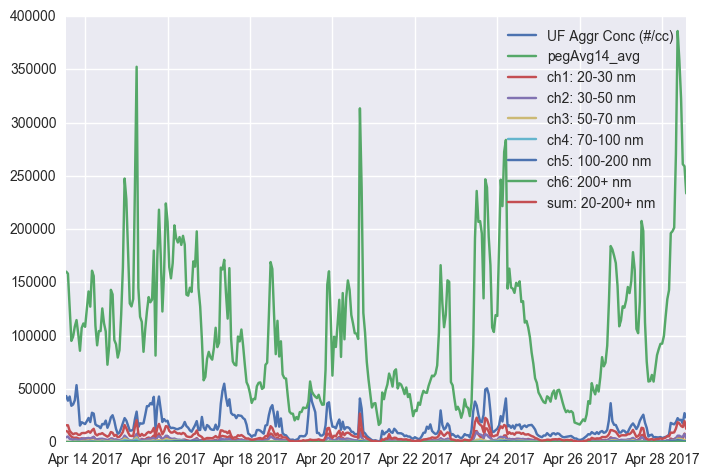

In [84]:
plt.plot(df['DateTime'],df['UF Aggr Conc (#/cc)'])
plt.plot(df['DateTime'],df['pegAvg14_avg'])
plt.plot(df['DateTime'],df['ch1: 20-30 nm'])
plt.plot(df['DateTime'],df['ch2: 30-50 nm'])
plt.plot(df['DateTime'],df['ch3: 50-70 nm'])
plt.plot(df['DateTime'],df['ch4: 70-100 nm'])
plt.plot(df['DateTime'],df['ch5: 100-200 nm'])
plt.plot(df['DateTime'],df['ch6: 200+ nm'])
plt.plot(df['DateTime'],df['sum: 20-200+ nm'])
plt.legend()

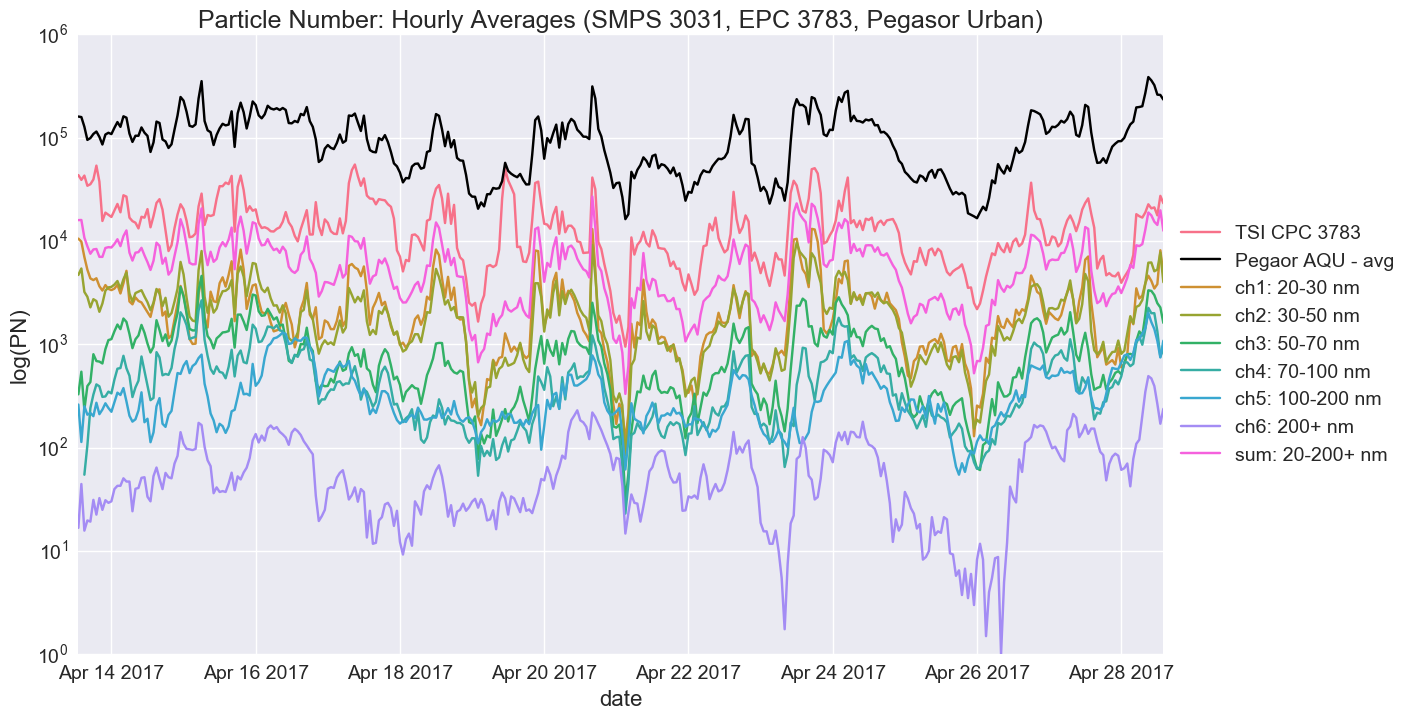

In [160]:
plt.figure(figsize=(14,8))
plt.semilogy(df['DateTime'],df['UF Aggr Conc (#/cc)'],color=colorz[0],label='TSI CPC 3783')
plt.semilogy(df['DateTime'],df['pegAvg14_avg'],color='k',label='Pegaor AQU - avg')
plt.semilogy(df['DateTime'],df['ch1: 20-30 nm'],color=colorz[1])
plt.semilogy(df['DateTime'],df['ch2: 30-50 nm'],color=colorz[2])
plt.semilogy(df['DateTime'],df['ch3: 50-70 nm'],color=colorz[3])
plt.semilogy(df['DateTime'],df['ch4: 70-100 nm'],color=colorz[4])
plt.semilogy(df['DateTime'],df['ch5: 100-200 nm'],color=colorz[5])
plt.semilogy(df['DateTime'],df['ch6: 200+ nm'],color=colorz[6])
plt.semilogy(df['DateTime'],df['sum: 20-200+ nm'],color=colorz[7])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('date',fontsize=16)
plt.ylabel('log(PN)',fontsize=16)
plt.title('Particle Number: Hourly Averages (SMPS 3031, EPC 3783, Pegasor Urban)',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=14)
plt.savefig('/Users/stella/Desktop/pn-hrly-cpc-smps-aqu.pdf',bbox_inches='tight')

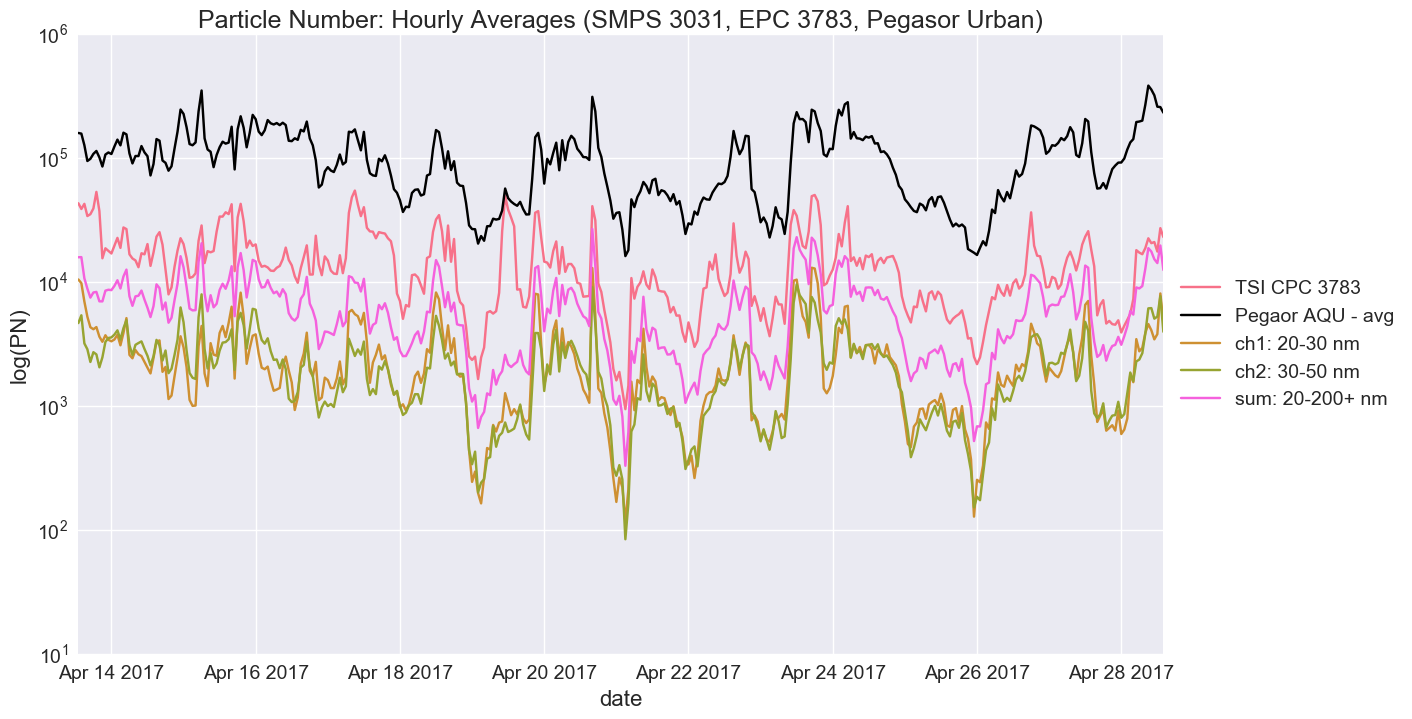

In [165]:
plt.figure(figsize=(14,8))
plt.semilogy(df['DateTime'],df['UF Aggr Conc (#/cc)'],color=colorz[0],label='TSI CPC 3783')
plt.semilogy(df['DateTime'],df['pegAvg14_avg'],color='k',label='Pegaor AQU - avg')
plt.semilogy(df['DateTime'],df['ch1: 20-30 nm'],color=colorz[1])
plt.semilogy(df['DateTime'],df['ch2: 30-50 nm'],color=colorz[2])
#plt.semilogy(df['DateTime'],df['ch3: 50-70 nm'],color=colorz[3])
#plt.semilogy(df['DateTime'],df['ch4: 70-100 nm'],color=colorz[4])
#plt.semilogy(df['DateTime'],df['ch5: 100-200 nm'],color=colorz[5])
#plt.semilogy(df['DateTime'],df['ch6: 200+ nm'],color=colorz[6])
#plt.semilogy(df['DateTime'],df['sum: 20-200+ nm'],color=colorz[7])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('date',fontsize=16)
plt.ylabel('log(PN)',fontsize=16)
plt.title('Particle Number: Hourly Averages (SMPS 3031, EPC 3783, Pegasor Urban)',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=14)
#plt.savefig('/Users/stella/Desktop/pn-hrly-cpc-smps-aqu.pdf',bbox_inches='tight')

In [ ]:
# epc range is 0.007 to 3 micrometer
# 7 nm - 3 um

In [118]:
x=df['UF Aggr Conc (#/cc)']
y=df['pegAvg14_avg']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2, p_value)

r-squared: 0.359150326122 1.14774169577e-36


In [119]:
x=df['UF Aggr Conc (#/cc)']
y=df['ch1: 20-30 nm']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2, p_value)

r-squared: 0.680697063038 2.90384677486e-91


In [120]:
x=df['UF Aggr Conc (#/cc)']
y=df['ch2: 30-50 nm']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2, p_value)

r-squared: 0.444418805293 7.12296128763e-48


In [121]:
x=df['UF Aggr Conc (#/cc)']
y=df['ch3: 50-70 nm']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2, p_value)

r-squared: 0.172706867813 1.50646393086e-16


In [122]:
x=df['UF Aggr Conc (#/cc)']
y=df['ch4: 70-100 nm']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2, p_value)

r-squared: 0.0753596022788 1.11271900782e-07


In [123]:
x=df['UF Aggr Conc (#/cc)']
y=df['ch5: 100-200 nm']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2, p_value)

r-squared: 0.0196725142088 0.00752662681306


In [124]:
x=df['UF Aggr Conc (#/cc)']
y=df['ch6: 200+ nm']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2, p_value)

r-squared: 0.010738287283 0.0488267484991


In [125]:
x=df['UF Aggr Conc (#/cc)']
y=df['sum: 20-200+ nm']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-squared:", r_value**2, p_value)

r-squared: 0.532173071685 2.37001641367e-61
